# Data Science Internship: Task-1_Prediction using Supervised ML

## Performed by: Ishan Taneja

### Data: http://bit.ly/w-data

# Simple Linear Regression
In this section I will see how the Python Scikit-Learn library for machine learning can be used to implement simple linear regression involving two variables.I will take percentage score and no. of hours studied as variables and predict the percentage of marks scored based upon the no. of hours studied.

In [18]:
#Importing necesarry libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [17]:
#Reading data from remote link
data= pd.read_csv("http://bit.ly/w-data")
print("Data Imported Successfully")
data.head


Data Imported Successfully


<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


I will now plot the data points on 2-D graph to check the dataset and see if we can manually find any relationship between the hours and scores. I have created the plot using following script:

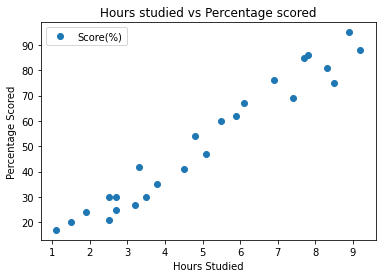

In [21]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o', linestyle='none')  
plt.title('Hours studied vs Percentage scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.legend(['Score(%)'])
plt.show()

From the graph above, it can be clearly seen that there is a positive linear relationship between the number of hours studied and percentage scored.

# Preparing the data
Now I have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In the dataset there are only two columns. I will predict the percentage score depending upon the hours studied. Therefore the attribute set will consist of the "Hours" column and the label will be the "Score" column. To extract the attributes and labels, execute the following script:



In [64]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

The attributes are stored in the X variable. I specified "-1" as the range for columns since I wanted the attribute set to contain all the columns except the last one, which is "Scores". Similarly the y variable contains the labels. I specified 1 for the label column since the index for "Scores" column is 1. Remember, the column indexes start with 0, with 1 being the second column. In the next section,I will see a better way to specify columns for attributes and labels.

Now that I have the attributes and labels, the next step is to split this data into training and test sets. I'll do this by using Scikit-Learn's built-in train_test_split() method:

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

# Training the Algorithm


In [67]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

With Scikit-Learn it is extremely straight forward to implement linear regression models, as I will import the LinearRegression class, instantiate it, and call the fit() method along with our training data. This is about as simple as it gets when using a machine learning library to train on your data.

In the theory section I said that linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset, execute the following code.

To retrieve the intercept:



In [72]:
print(linear_reg.intercept_)


2.0181600414346974


For retrieving the slope (coefficient of a):

In [71]:
print(linear_reg.coef_)

[9.91065648]


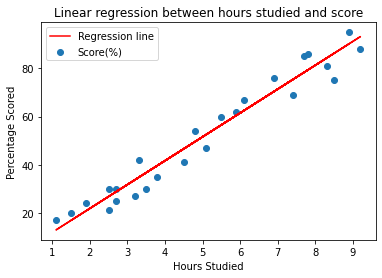

In [82]:
#plotting the regresion line
dep_var= X*linear_reg.coef_ + linear_reg.intercept_

plt.scatter(data.Hours,data.Scores)
plt.plot(data.Hours,dep_var, color= 'red')
plt.title('Linear regression between hours studied and score')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.legend(['Regression line' ,'Score(%)'])
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make pre-dictions on the test data, execute the following script:

In [91]:
No_of_Hours= [[9.25]]
Predicted_value= linear_reg.predict(No_of_Hours)
print("No of Hours = {}".format(No_of_Hours))
print("Predicted Score = {}".format(Predicted_value))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]
